# Application Codes
# Execution: Kernel -> Restart & Run All
# <font color = blue>See Project Documentation for details</font>

### Setting variables

In [1]:
import os
vType = "ALL"
randomSeed = 1099
numSamples = 250 #Max Num of slice samples from each file
vectorDim = 30 #num of vector cols
slicePath = './data/slicesSource/'
tokenPath = './data/token/SARD/'
w2vmodelPath = './w2vModel/model/w2vModel_ALL'
vectorPath =  './data/vector/'
vectorTrainPath = './data/DLvectors/train/'
vectorTestPath = './data/DLvectors/test/'
dlInputsTrainPath = './data/DLinputs/train/'
dlInputsTestPath  = './data/DLinputs/test/'

### A. slicesToTokens.py

In [2]:
from slicesToTokens import *
mycase_ID = tokenizeSlices(slicePath, tokenPath, numSamples)

Slice Files To be Processed:  Arithmetic expression.txt
Total Corpus Files:  250
Last Program ID:  298285
Slice Files To be Processed:  Pointer usage.txt
Total Corpus Files:  250
Last Program ID:  249
Slice Files To be Processed:  API function call.txt
Total Corpus Files:  250
Last Program ID:  8339
Slice Files To be Processed:  Array usage.txt
Total Corpus Files:  250
Last Program ID:  58678


#### Input: 	
- Raw Slice files.txt

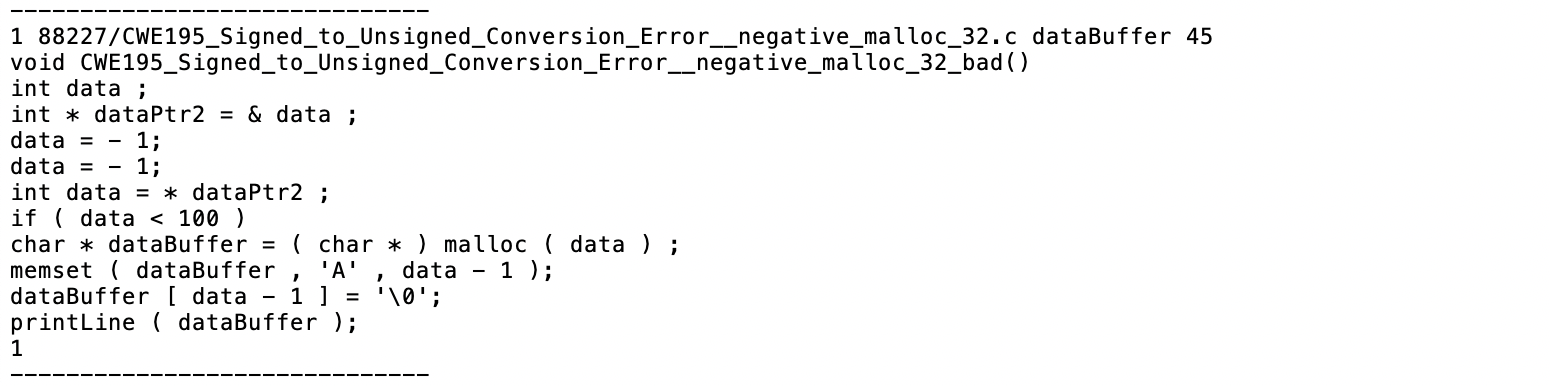

#### Output: 
- .pkl files of each program, containing 5 items in array: 
- [list of tokens, label, function list in each program, filename, vulnerability type]

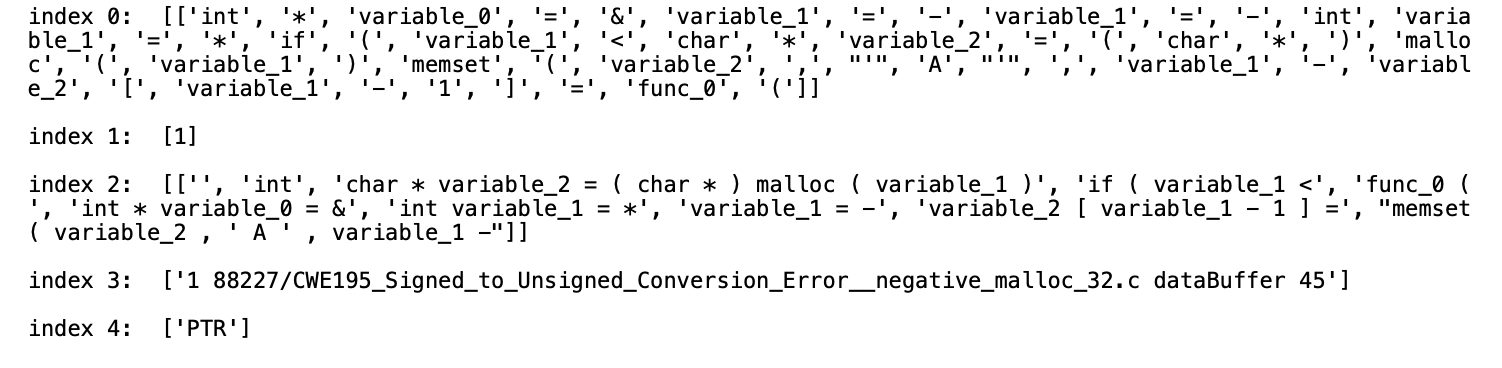

### B.  isDuplicatedID.py

In [3]:
from isDuplicatedID import *
print("The dataset has duplicated ID: ", isDuplicatedID(mycase_ID))

The dataset has duplicated ID:  False


### C. tokensToVectors.py

In [4]:
from tokensToVectors import *
myW2Vmodel = createW2VModel(w2vmodelPath, tokenPath, vectorDim)
fitW2VModel(w2vmodelPath, tokenPath, vectorPath)

Fitting W2V model from corpus...
Model created and saved in: ./w2vModel/model/w2vModel_ALL
Number of words in model: 497
W2V Completed: The vector file is in vector folder


#### Input: 	
- Tokens in index 0 in each .pkl file in './data/token/SARD'

#### Output:  
- 1.   W2V Model created and saved in './w2vModel/w2vModel_ALL'
- 2.	Vocabs in W2V Model saved in wordsW2Vmodel.txt
- 3.	 index 0 is Transformed tokens to vectors saved in './data/vector/' 
                3.1 For 1 program, vector array has 30 columns(Vdim), row = (#of tokens)
                3.2 .pkl files of each program, containing 5 items in array:
                3.3 One token is transformed to 30 vectors as shown below


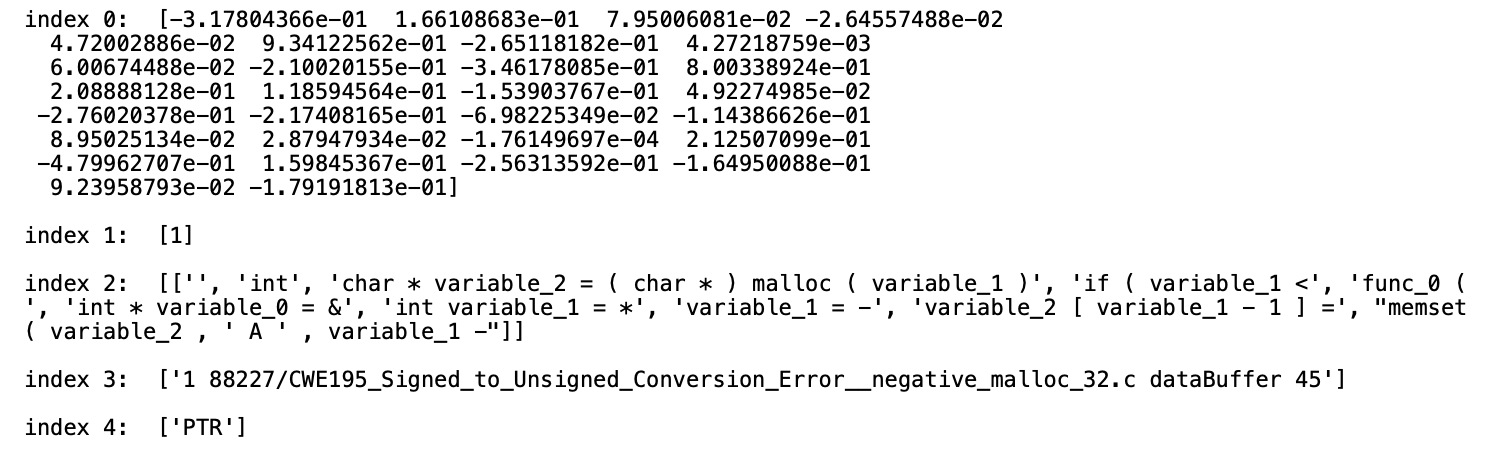

### D. splitTrainTest.py

In [5]:
from splitTrainTest import *
splitTrainTest(vType, vectorPath, vectorTrainPath, vectorTestPath,randomSeed, split = 0.8 )

Samples in Train set:  800
Samples in Test set:  200
Finished Splitting data with seed number:  1099
Train/Test Sets saved in DLVectors folder


#### Input: 	
- Vector files in './data/vector/'

#### Output:   
- 1. ALL_Train.pkl in './data/DLvectors/train/'
- 2. ALL_Test.pkl in './data/DLvectors/test/'


### E. downSampling.py

In [6]:
from downSampling import *
caseID_one,caseID_zero,downsampleNum = appendCaseIDLabel0(vectorTrainPath)
downsampling (caseID_one,caseID_zero, downsampleNum , randomSeed, vectorPath, vectorTrainPath)
#Optional used to check if the class label are balanced 
print("Class Label is balanced: " , isClassBalanced(vectorTrainPath))

./data/DLvectors/train/ALL_train.pkl
Elements in each vector .pkl file:  6
Downsampling with seed number:  1099
Done! balancedClassTrain.pkl saved in ./data/DLvectors/train/ 
balancedClassTrain.pkl
total label 0:  185
total label 1:  185
total sample:  370
Class Label is balanced:  True


#### Input: 	
- Train set in train.pkl

#### Output:   
- Balanced Train set in balancedClassTrain.pkl, Saved in ./data/DLvectors/train/ 

### F. adjustVectorLen.py

In [7]:
from adjustVectorLen import *
avg = meanLen(vectorTrainPath)
tranformVectorLen(vectorTrainPath, vectorTestPath, dlInputsTrainPath, dlInputsTestPath, avg, vectorDim, vType)
print("New Vector Length (rows x cols): " ,avg, " x " ,vectorDim)


Loading data...
./data/DLvectors/train/balancedClassTrain.pkl
Mean Vector Length 127
Loading data...
Train set
./data/DLvectors/train/balancedClassTrain.pkl
threshold:  3810
New Vector Length:  127

Test set
./data/DLvectors/test/ALL_test.pkl
threshold:  3810
New Vector Length:  127
New Vector Length (rows x cols):  127  x  30


#### Input: 	
- Balanced Train & Test sets in ./data/DLvectors/

#### Output:   
- Balanced Train & Test sets with same length vectors in ./data/DLInputs

### G. saveKeyData.py

In [8]:
from saveKeyData import *
saveKeyData(dlInputsTrainPath)
saveKeyData(dlInputsTestPath)

Save metadata from filename: DL_Final_balancedClassTrain.pkl
['135', '8322', '8110', '298111', '8117', '298129', '58514', '104', '50', '103', '298127', '8186', '8172', '298180', '58576', '8181', '159', '32', '166', '298189'] 

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1] 

['PTR', 'API', 'API', 'AE', 'API', 'AE', 'ARR', 'PTR', 'PTR', 'PTR', 'AE', 'API', 'API', 'AE', 'ARR', 'API', 'PTR', 'PTR', 'PTR', 'AE'] 

Save metadata from filename: DL_Final_ALL_test.pkl
['36', '298284', '58621', '8234', '298208', '8119', '58523', '102', '8282', '8104', '58541', '58585', '8213', '8281', '298108', '298267', '65', '58625', '8236', '58536'] 

[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0] 

['PTR', 'AE', 'ARR', 'API', 'AE', 'API', 'ARR', 'PTR', 'API', 'API', 'ARR', 'ARR', 'API', 'API', 'AE', 'AE', 'PTR', 'ARR', 'API', 'ARR'] 



#### Input: 	
- Balanced Final Train & Test  Final sets in ./data/DLvectors/

#### Output:   
- trainKeyData.txt, testKeyData.txt

### H. DLModel.py

In [9]:
from DLModel import *
myoptimizer = 'adam' #can be changed to ‘adamax’
maxlen = avg #avg calculated from part 5.6
layers = 2
dropout = 0.2 
batchSize = 32
vectorDim = 30

Using TensorFlow backend.


#### Input: 	
- final train set 

#### Output:   
- fitted BGRU model saved in './model/BRGU_ALL'

### Network Architechture

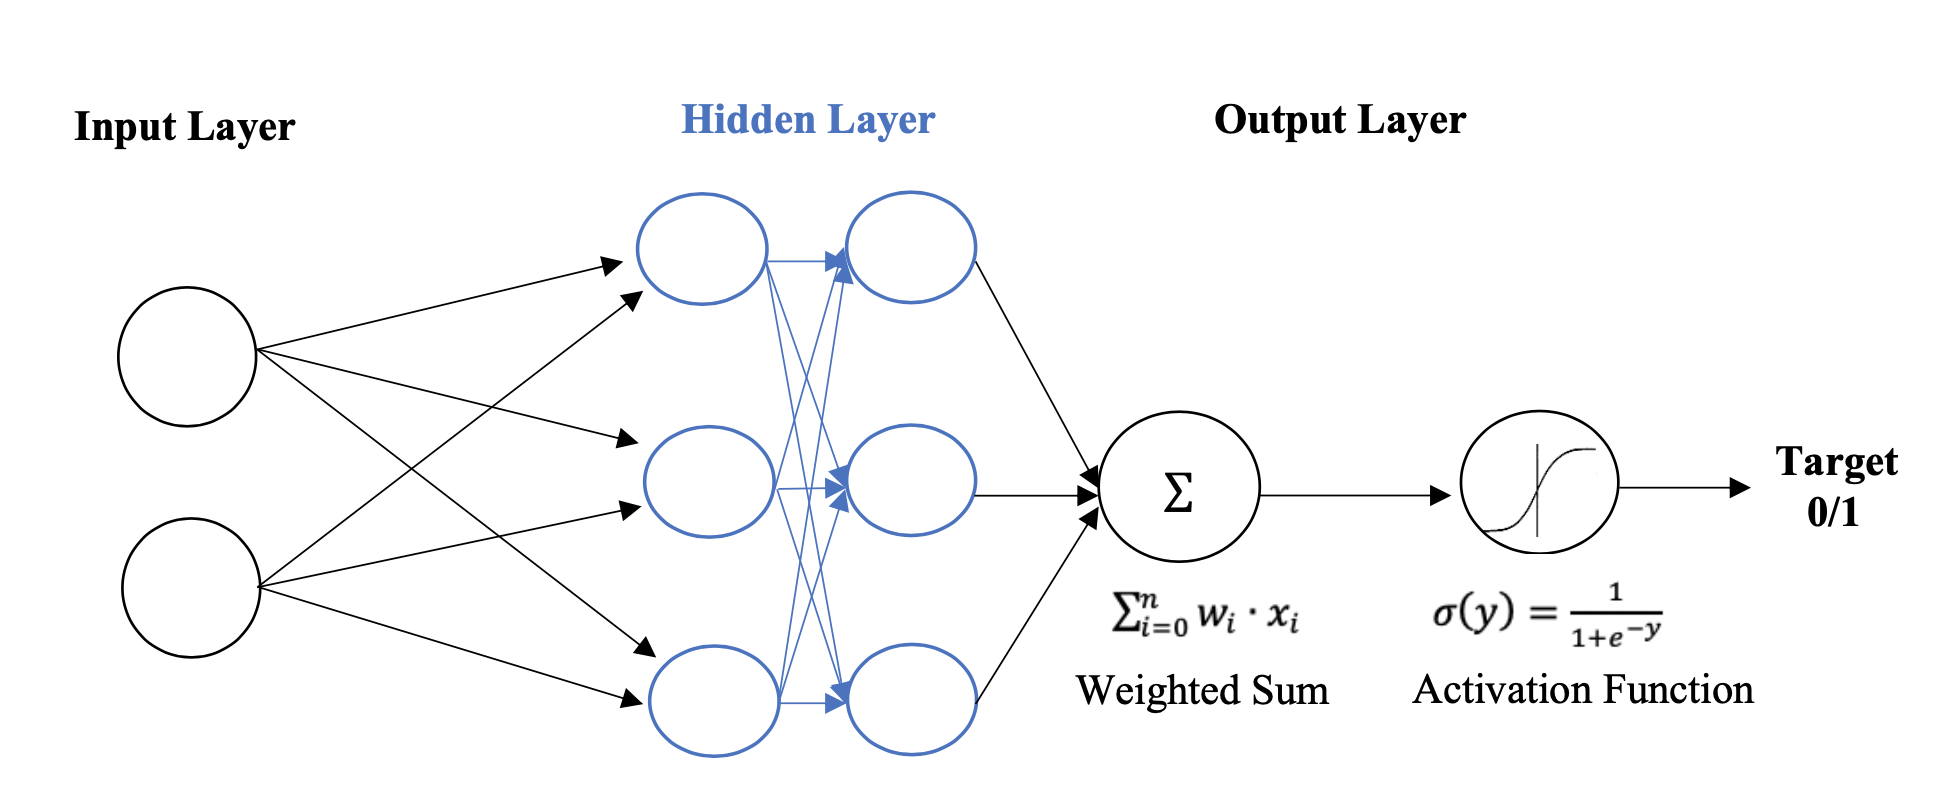

### Part A: BGRU

In [10]:
#Build BGRU Model with parameters 
myKerasModel =  buildBGRU(maxlen, vectorDim, layers, dropout,myoptimizer )

#Fit BGRU Model with trained data and saved the model for later use
weightpath = './model/BRGU_ALL' + myoptimizer +str(randomSeed)
mymodel = fitModel(myKerasModel, weightpath, dlInputsTrainPath, batchSize, maxlen, vectorDim, randomSeed)

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 127, 30)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 127, 512)          440832    
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 512)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               1181184   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 1,622,529
Trainable params: 1,622,529
Non-trainable params: 0
_____________________________

### Part B: BLSTM

In [11]:
#Build BLSTMModel with parameters 
myKerasModel =  buildBLSTM(maxlen, vectorDim, layers, dropout,myoptimizer )

#Fit BLSTM Model with trained data and saved the model for later use
weightpath = './model/BLSTM_ALL' + myoptimizer +str(randomSeed)
mymodel = fitModel(myKerasModel, weightpath, dlInputsTrainPath, batchSize, maxlen, vectorDim, randomSeed)


Build model...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, 127, 30)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 127, 512)          587776    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 512)               1181184   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 1,769,473
Trainable params: 1,769,473
Non-trainable params: 0
_________________________________________________________________
Fit model with Trainning set...
DL_Final_balancedClassTrain.pkl
370 370
start
Epoch 1/10
11/11 

### I. DLPrediction.py

In [12]:
#all parameters are same as section 5.8
from DLModel import *
from DLPrediction import *
myoptimizer = 'adam'
maxlen = avg
layers = 2
dropout = 0.2 
batchSize = 32

#### Input: 	
- final test set and saved model

#### Output:   
- output values and predicted values from Model saved to excel file: OutputSummary_adamRandomseed.xlsx

### Part A: BGRU

In [13]:
modelName = 'BGRU'
weightpath = './model/BRGU_ALL' + myoptimizer +str(randomSeed)
myKerasModelADAM =  buildBGRU(maxlen,vectorDim, layers, dropout,myoptimizer )
myKerasModelADAM.load_weights(weightpath)
testID_label, output_dl_labels, mypredicted_labels, myreallabels, myvtypelabels  = predictLabel(myKerasModelADAM, dlInputsTestPath, maxlen, vectorDim, myoptimizer, modelName, randomSeed)


Build model...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_3 (Masking)          (None, 127, 30)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 127, 512)          440832    
_________________________________________________________________
dropout_4 (Dropout)          (None, 127, 512)          0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 512)               1181184   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 1,622,529
Trainable params: 1,622,529
Non-trainable params: 0
_____________________________

### Part B: BLSTM

In [14]:
modelName = 'BLSTM'
weightpath = './model/BLSTM_ALL' + myoptimizer +str(randomSeed)
myKerasModelADAM2 =  buildBLSTM(maxlen,vectorDim,layers,dropout,myoptimizer )
myKerasModelADAM2.load_weights(weightpath)
testID_label2, output_dl_labels2, mypredicted_labels2, myreallabels2, myvtypelabels  = predictLabel(myKerasModelADAM2, dlInputsTestPath, maxlen, vectorDim, myoptimizer, modelName, randomSeed)


Build model...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_4 (Masking)          (None, 127, 30)           0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 127, 512)          587776    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 512)               1181184   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 1,769,473
Trainable params: 1,769,473
Non-trainable params: 0
_________________________________________________________________
[0.5794399, 0.212548, 0.0015563264, 0.49924928, 0.46888825, 0.6445583, 0.4754846, 0.114921354, 

## J. ConfusionMatrix.py

#### Input: 	
- predicted label and real label from part I

#### Output:   
- confusion matrix 

In [15]:
from ConfusionMatrix import *
getConfusionMatrix(mypredicted_labels, myreallabels)#BGRU
getConfusionMatrix(mypredicted_labels2, myreallabels2)#BLSTM

Predicted Class
Total Samples 200.0
| Type     |   Positive |   Negative |
|----------+------------+------------|
| Positive |         36 |         16 |
| Negative |         51 |         97 |

Predicted Class
╒══════════╤════════════════════╤════════════════════╤════════════════════╤═════════════╕
│          │ Positive           │ Negative           │ Rate               │             │
╞══════════╪════════════════════╪════════════════════╪════════════════════╪═════════════╡
│ Positive │ 36.0               │ 16.0               │ 0.692307710647583  │ Sensitivity │
├──────────┼────────────────────┼────────────────────┼────────────────────┼─────────────┤
│ Negative │ 51.0               │ 97.0               │ 0.6554054021835327 │ specificity │
├──────────┼────────────────────┼────────────────────┼────────────────────┼─────────────┤
│          │ 0.4137931168079376 │ 0.8584070801734924 │ 0.6650000214576721 │ Accuracy    │
├──────────┼────────────────────┼────────────────────┼─────────────────

---

--- 

# Output Analysis

In [16]:
import numpy as np
import pandas as pd
import os

fileName = "OutputSummary_adamBGRU1099.xlsx"
DLdata = pd.read_excel(fileName)
DLdata.head(10)

,Unnamed: 0,TestID,DLOutput,PredLabel,RealLabel,Vtype
0,0,36,0.666415,1,1,PTR
1,1,298284,0.194746,0,1,AE
2,2,58621,0.110193,0,0,ARR
3,3,8234,0.662713,1,0,API
4,4,298208,0.434459,0,0,AE
5,5,8119,0.661917,1,1,API
6,6,58523,0.628414,1,0,ARR
7,7,102,0.314072,0,0,PTR
8,8,8282,0.798364,1,0,API
9,9,8104,0.390549,0,0,API


In [17]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Vtype", y='DLOutput', hue='RealLabel', data=DLdata, linewidth=1.5, palette="Set3")

## K. evaluateModels.py

In [18]:
from evaluateModels import *
thresdArray = [0.40, 0.45,0.5, 0.53, 0.55, 0.58, 0.60, 0.65, 0.70, 0.8]
mydata, recall, precision, specificity, F1, Accuracy, balanceAccuracy  = combinedPredictions(thresdArray, DLdata)
mydata.to_excel("predictionWithDiffThreshold_gruadam.xlsx")  
mydata.head(10)

,Unnamed: 0,TestID,DLOutput,PredLabel,RealLabel,Vtype,Pred0.4,Metric0.4,Pred0.45,Metric0.45,...,Pred0.58,Metric0.58,Pred0.6,Metric0.6,Pred0.65,Metric0.65,Pred0.7,Metric0.7,Pred0.8,Metric0.8
0,0,36,0.666415,1,1,PTR,1,TP,1,TP,...,1,TP,1,TP,1,TP,0,FN,0,FN
1,1,298284,0.194746,0,1,AE,0,FN,0,FN,...,0,FN,0,FN,0,FN,0,FN,0,FN
2,2,58621,0.110193,0,0,ARR,0,TN,0,TN,...,0,TN,0,TN,0,TN,0,TN,0,TN
3,3,8234,0.662713,1,0,API,1,FP,1,FP,...,1,FP,1,FP,1,FP,0,TN,0,TN
4,4,298208,0.434459,0,0,AE,1,FP,0,TN,...,0,TN,0,TN,0,TN,0,TN,0,TN
5,5,8119,0.661917,1,1,API,1,TP,1,TP,...,1,TP,1,TP,1,TP,0,FN,0,FN
6,6,58523,0.628414,1,0,ARR,1,FP,1,FP,...,1,FP,1,FP,0,TN,0,TN,0,TN
7,7,102,0.314072,0,0,PTR,0,TN,0,TN,...,0,TN,0,TN,0,TN,0,TN,0,TN
8,8,8282,0.798364,1,0,API,1,FP,1,FP,...,1,FP,1,FP,1,FP,1,FP,0,TN
9,9,8104,0.390549,0,0,API,0,TN,0,TN,...,0,TN,0,TN,0,TN,0,TN,0,TN


## L. plotCounts.py

/Users/amy_a/Desktop/New_codes/plotCounts.py:20: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color = colors, label=names)


TN    97
FP    51
TP    36
FN    16
Name: Metric0.5, dtype: int64


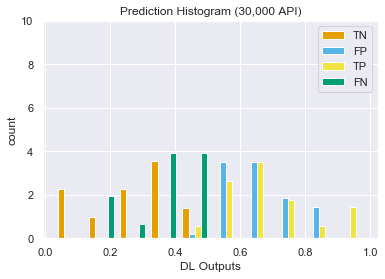

In [19]:
from plotCounts import *
colName = "Metric0.5"
mydata = mydata
plotHistogram(mydata, colName)

TN    97
FP    51
TP    36
FN    16
Name: Metric0.5, dtype: int64


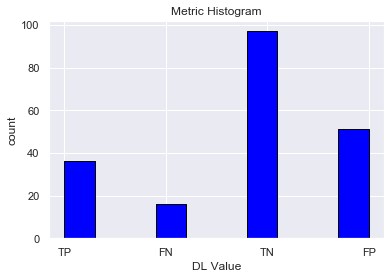

In [20]:
plotBar(mydata, colName)

In [21]:
myTable = generateMetricTabel(thresdArray, recall, precision, specificity, F1, Accuracy, balanceAccuracy)
print(myTable)

Predicted Class
╒═══════════════╤══════════╤═════════════╤═══════════════╤══════════╤════════════╤═══════════════════╕
│   thresdArray │   recall │   precision │   specificity │       F1 │   Accuracy │   balanceAccuracy │
╞═══════════════╪══════════╪═════════════╪═══════════════╪══════════╪════════════╪═══════════════════╡
│               │          │             │               │          │            │                   │
├───────────────┼──────────┼─────────────┼───────────────┼──────────┼────────────┼───────────────────┤
│          0.4  │ 0.846154 │    0.4      │      0.554054 │ 0.54321  │      0.63  │          0.700104 │
├───────────────┼──────────┼─────────────┼───────────────┼──────────┼────────────┼───────────────────┤
│          0.45 │ 0.730769 │    0.413043 │      0.635135 │ 0.527778 │      0.66  │          0.682952 │
├───────────────┼──────────┼─────────────┼───────────────┼──────────┼────────────┼───────────────────┤
│          0.5  │ 0.692308 │    0.413793 │      0.655405 

## Appendix A : Plot Recall VS Precision 

No handles with labels found to put in legend.


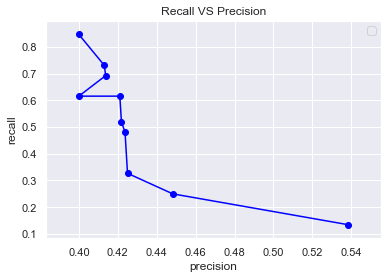

In [22]:
import matplotlib.pyplot as plt
plt.scatter(precision, recall, color='blue')
plt.plot(precision, recall, color='blue')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Recall VS Precision')
plt.legend()

## Appendix B : Plot F1, balancedAccuracy with Different Threshold

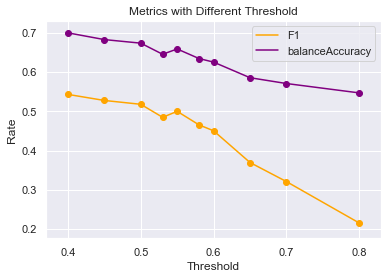

In [23]:
import matplotlib.pyplot as plt
plt.scatter(thresdArray, F1, color='orange')
plt.plot(thresdArray, F1, color='orange', label="F1")
plt.scatter(thresdArray,balanceAccuracy, color='purple')
plt.plot(thresdArray, balanceAccuracy, color='purple', label="balanceAccuracy")
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Metrics with Different Threshold')
plt.legend()

## Appendix C : Plot Accuracy, balancedAccuracy with Different Thresholds

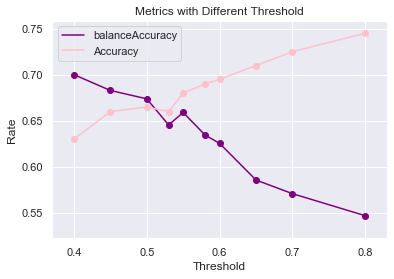

In [24]:
plt.scatter(thresdArray,balanceAccuracy, color='purple')
plt.plot(thresdArray, balanceAccuracy, color='purple', label="balanceAccuracy")
plt.scatter(thresdArray,Accuracy, color='pink')
plt.plot(thresdArray, Accuracy, color='pink', label="Accuracy")
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Metrics with Different Threshold')
plt.legend()

## Appendix D : Plot Accuracy, Specificity with Different Thresholds

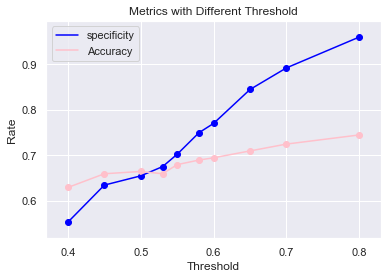

In [25]:
plt.scatter(thresdArray,specificity, color='blue')
plt.plot(thresdArray, specificity, color='blue', label="specificity")
plt.scatter(thresdArray,Accuracy, color='pink')
plt.plot(thresdArray, Accuracy, color='pink', label="Accuracy")
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Metrics with Different Threshold')
plt.legend()